In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing  import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids


# Preprocessing

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/2-Faza-Grace/refs/heads/master/Data/asia_df.csv')
df.head(5)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Armenia,Yerevan,40.18,44.51,Asia/Yerevan,1715849100,2024-05-16 12:45:00,19.0,66.2,Partly cloudy,...,0.8,0.9,1,1,05:45 AM,08:12 PM,01:17 PM,02:31 AM,Waxing Gibbous,55
2,Azerbaijan,Baku,40.40,49.88,Asia/Baku,1715849100,2024-05-16 12:45:00,17.0,62.6,Partly cloudy,...,1.9,2.2,1,1,05:23 AM,07:51 PM,12:54 PM,02:10 AM,Waxing Gibbous,55
3,Bahrain,Manama,26.24,50.58,Asia/Bahrain,1715849100,2024-05-16 11:45:00,36.0,96.8,Sunny,...,39.0,114.3,2,4,04:50 AM,06:18 PM,12:10 PM,12:45 AM,Waxing Gibbous,55
4,Bangladesh,Dhaka,23.72,90.41,Asia/Dhaka,1715849100,2024-05-16 14:45:00,38.4,101.2,Partly Cloudy,...,49.7,57.0,3,6,05:16 AM,06:34 PM,12:28 PM,12:58 AM,Waxing Gibbous,55


In [ ]:
df.duplicated().sum()

0

In [ ]:
missing_values = df.isna().sum()
missing_values[missing_values > 0]

,0


In [ ]:
# columns_to_drop = ["country", "location_name", "latitude", "longitude", "timezone", "last_updated_epoch", "last_updated", "sunrise", "sunset", "moonrise", "moonset", "moon_phase", "moon_illumination", 'condition_text', 'wind_direction', 'wind_degree']
# df.drop(columns=columns_to_drop, inplace=True)
# df.head(5)

In [ ]:
# numeric_features = df.select_dtypes(include='number').columns
# plt.figure(figsize=(12, 8))
# sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Heatmap Korelasi Antar Fitur")
# plt.show()

In [ ]:
# column_multikolinearitas = ['gust_mph', 'feels_like_fahrenheit', 'temperature_fahrenheit', 'air_quality_gb-defra-index', 'wind_mph', 'pressure_in', 'visibility_miles', 'precip_in', 'feels_like_celsius', 'gust_kph', 'precip_mm', 'air_quality_us-epa-index']
# df.drop(columns=column_multikolinearitas, inplace=True)
# df.head(5)

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
column = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Sulphur_dioxide', 'air_quality_Nitrogen_dioxide', 'air_quality_PM2.5', 'air_quality_PM10']
df = df[column]

In [ ]:
df['air_quality_PM10'] = df['air_quality_PM10'].apply(lambda x: df['air_quality_PM10'].median() if x <= 0 else x)
df['air_quality_PM2.5'] = df['air_quality_PM2.5'].apply(lambda x: df['air_quality_PM2.5'].median() if x <= 0 else x)
df['air_quality_Carbon_Monoxide'] = df['air_quality_Carbon_Monoxide'].apply(lambda x: df['air_quality_Carbon_Monoxide'].median() if x <= 0 else x)
df['air_quality_Nitrogen_dioxide'] = df['air_quality_Nitrogen_dioxide'].apply(lambda x: df['air_quality_Nitrogen_dioxide'].median() if x <= 0 else x)
df['air_quality_Ozone'] = df['air_quality_Ozone'].apply(lambda x: df['air_quality_Ozone'].median() if x <= 0 else x)
df['air_quality_Sulphur_dioxide'] = df['air_quality_Sulphur_dioxide'].apply(lambda x: df['air_quality_Sulphur_dioxide'].median() if x <= 0 else x)

<ipython-input-102-c1a7a4937af5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['air_quality_PM10'] = df['air_quality_PM10'].apply(lambda x: df['air_quality_PM10'].median() if x <= 0 else x)
<ipython-input-102-c1a7a4937af5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['air_quality_PM2.5'] = df['air_quality_PM2.5'].apply(lambda x: df['air_quality_PM2.5'].median() if x <= 0 else x)
<ipython-input-102-c1a7a4937af5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

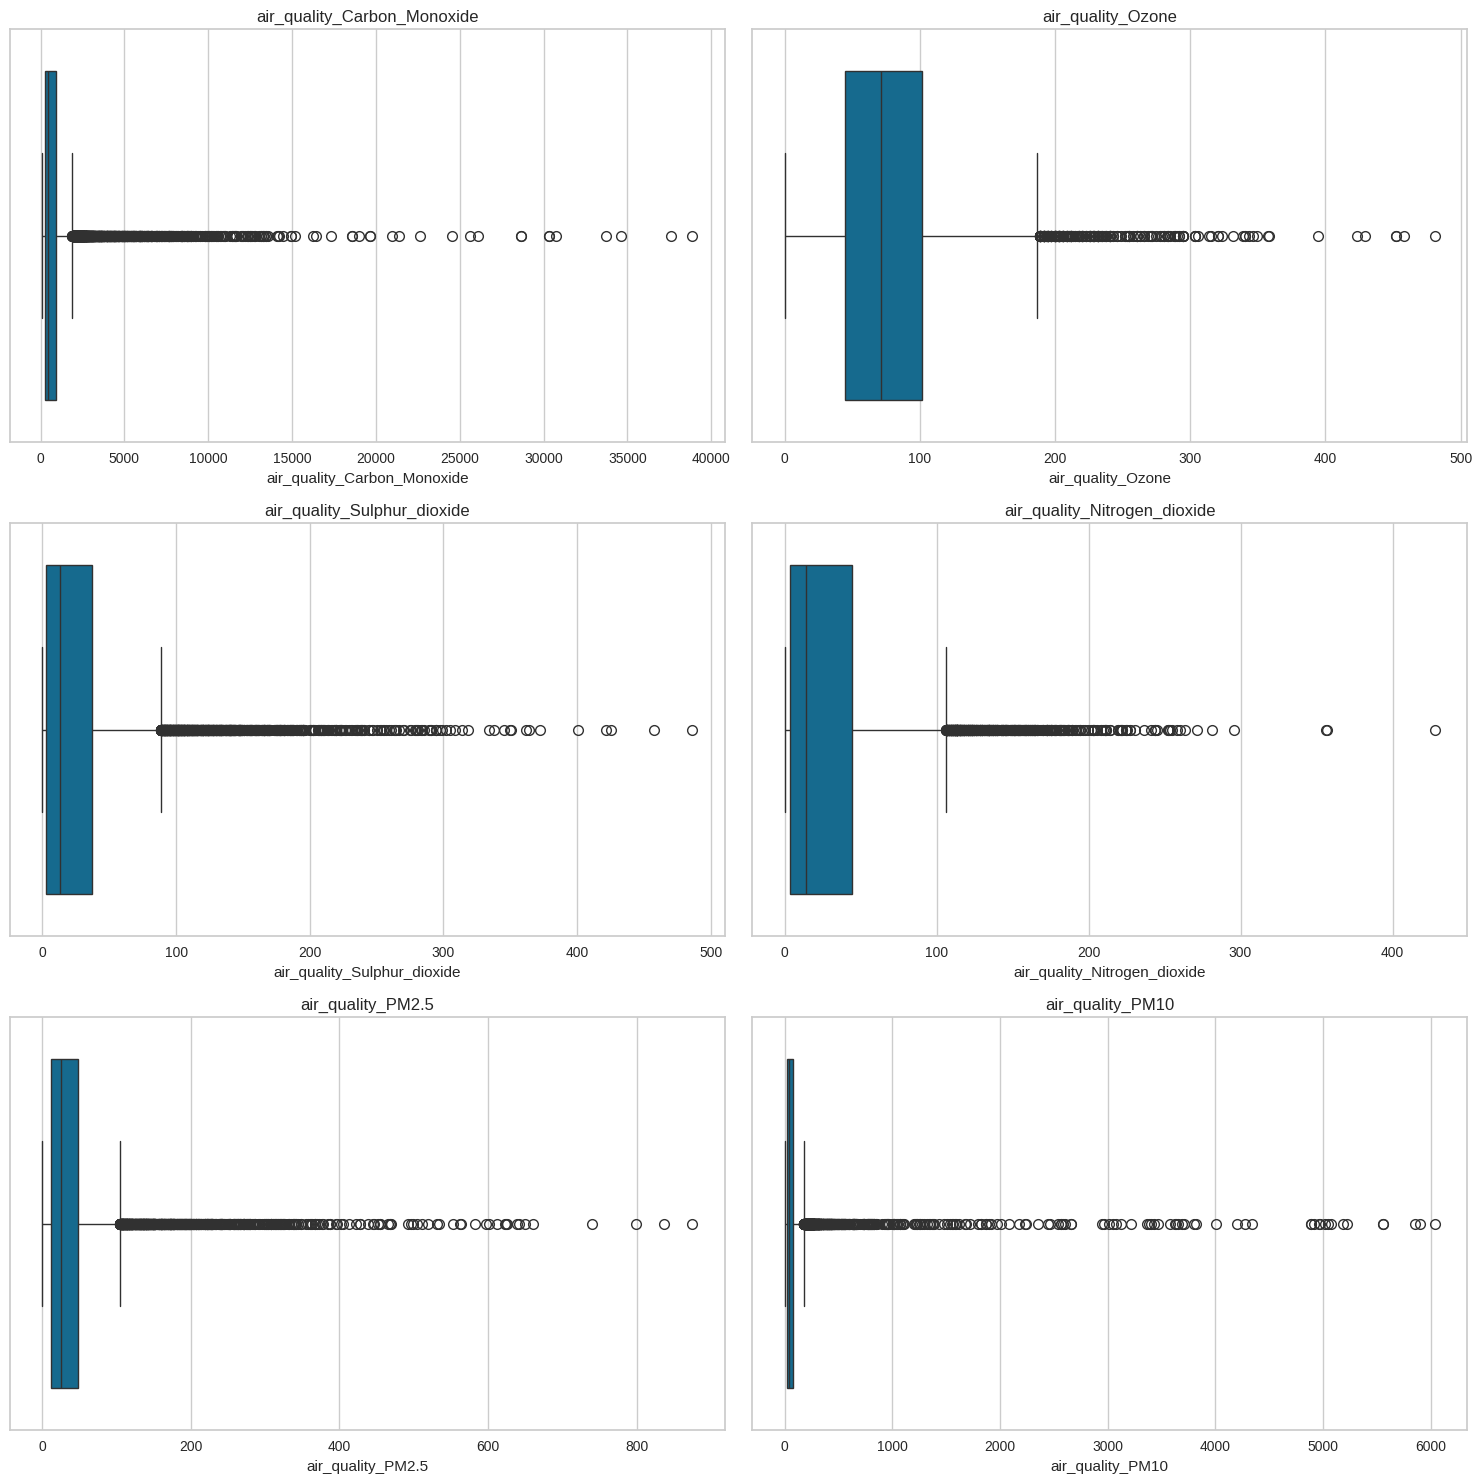

In [ ]:
numeric_features = df.select_dtypes(include='number').columns

total_features = len(numeric_features)
n_cols = 2
n_rows = -(-total_features // n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# q1 = df[numeric_features].quantile(0.25)
# q3 = df[numeric_features].quantile(0.75)
# IQR = q3 - q1

In [ ]:
# condition = ~((df[numeric_features] < (q1 - 1.5 * IQR)) | (df[numeric_features] > (q3 + 1.5 *IQR))).any(axis=1)
# df_filtered_numeric = df.loc[condition, numeric_features]

# categorical_features = df.select_dtypes(include=['object']).columns
# df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

In [ ]:
# numeric_features = df.select_dtypes(include='number').columns

# total_features = len(numeric_features)
# n_cols = 2
# n_rows = -(-total_features // n_cols)

# fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
# axes = axes.flatten()

# for i, feature in enumerate(numeric_features):
#     sns.boxplot(x=df[feature], ax=axes[i])
#     axes[i].set_title(feature)

# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

In [ ]:
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
df

,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10
0,-0.398362,0.552119,-0.697461,-0.772579,-0.598162,-0.225664
1,-0.451397,0.552119,-0.694976,-0.775288,-0.737944,-0.321480
2,-0.427793,0.090278,-0.657702,-0.610071,-0.717712,-0.316634
3,-0.327610,0.489824,-0.461393,-0.301306,-0.035354,0.101305
4,-0.254915,2.395190,-0.585640,-0.566736,0.161445,-0.112325
...,...,...,...,...,...,...
13645,-0.272838,-0.178235,-0.224332,0.941338,-0.269489,-0.184821
13646,-0.362132,0.809891,-0.444993,-0.386488,-0.228658,-0.162749
13647,-0.257593,0.036575,-0.555324,-0.496722,-0.647177,-0.302765
13648,0.783446,-0.715260,0.722672,0.199760,1.047314,0.042790


# Coba binning

In [ ]:
df_binned = pd.DataFrame()
bins = 4
for col in column:
    df_binned[col + "_binned"] = pd.qcut(df[col], q=bins, labels=[1, 2, 3, 4])

In [ ]:
binned_columns = [col + '_binned' for col in column]
df_binned = df[binned_columns]

In [ ]:
scaler = StandardScaler()
df_binned = scaler.fit_transform(df_binned)

# Clustering

## K-Means Clustering

In [ ]:
df.head()

,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10
0,-0.398362,0.552119,-0.697461,-0.772579,-0.598162,-0.225664
1,-0.451397,0.552119,-0.694976,-0.775288,-0.737944,-0.321480
2,-0.427793,0.090278,-0.657702,-0.610071,-0.717712,-0.316634
3,-0.327610,0.489824,-0.461393,-0.301306,-0.035354,0.101305
4,-0.254915,2.395190,-0.585640,-0.566736,0.161445,-0.112325


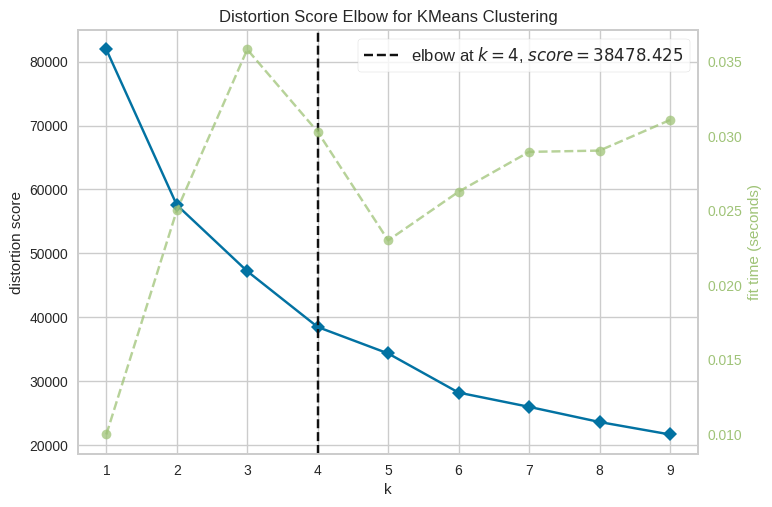

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df)
visualizer.show()

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)

labels = kmeans.labels_

def analyze_clusters(X, labels, k, feature_names):
    print('Analisis Karakteristik Setiap Cluster:\n')

    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        mean_values = cluster_data.mean(axis=0)

        print(f'--- Cluster {cluster_id + 1} ---')
        for feature, mean_val in zip(feature_names, mean_values):
            print(f'{feature}: {mean_val:.2f}')
        print('\n')

analyze_clusters(df, labels, k, numeric_features)


Analisis Karakteristik Setiap Cluster:

--- Cluster 1 ---
air_quality_Carbon_Monoxide: -0.23
air_quality_Ozone: -0.35
air_quality_Sulphur_dioxide: 0.82
air_quality_Nitrogen_dioxide: 0.59
air_quality_PM2.5: 5.26
air_quality_PM10: 12.61


--- Cluster 2 ---
air_quality_Carbon_Monoxide: -0.28
air_quality_Ozone: 0.17
air_quality_Sulphur_dioxide: -0.43
air_quality_Nitrogen_dioxide: -0.48
air_quality_PM2.5: -0.35
air_quality_PM10: -0.16


--- Cluster 3 ---
air_quality_Carbon_Monoxide: 4.13
air_quality_Ozone: -0.78
air_quality_Sulphur_dioxide: 2.92
air_quality_Nitrogen_dioxide: 3.01
air_quality_PM2.5: 2.91
air_quality_PM10: 0.56


--- Cluster 4 ---
air_quality_Carbon_Monoxide: 0.33
air_quality_Ozone: -0.38
air_quality_Sulphur_dioxide: 0.85
air_quality_Nitrogen_dioxide: 1.01
air_quality_PM2.5: 0.56
air_quality_PM10: 0.15




In [ ]:
sil_score = silhouette_score(df, labels)
print(f'Silhouette Score: {sil_score:.2f}')


Silhouette Score: 0.41


## DBSCAN

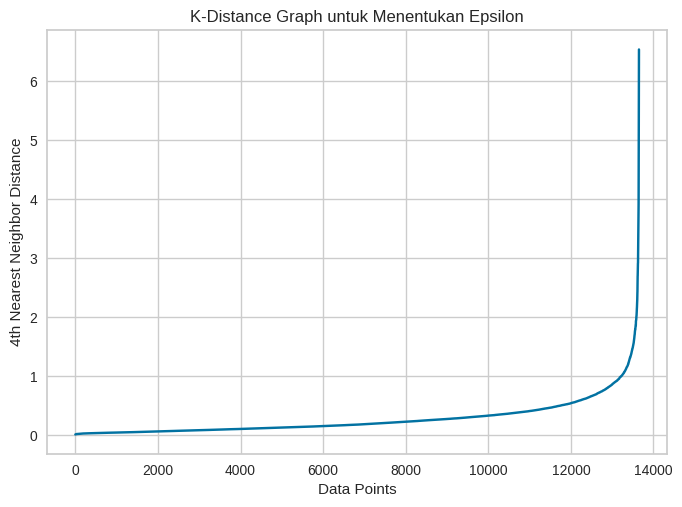

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(df)
distances, indices = neigh.kneighbors(df)

distances = np.sort(distances[:, 4], axis=0)

plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("K-Distance Graph untuk Menentukan Epsilon")
plt.show()


['y', 'b', 'g', 'r']


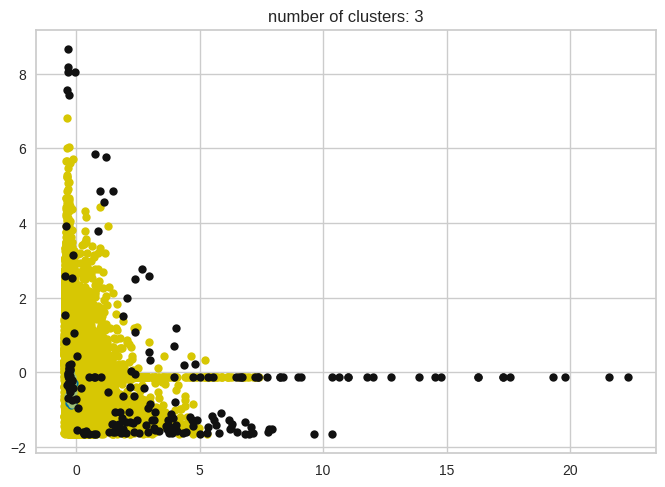

In [ ]:
db = DBSCAN(eps=1.4, min_samples=12)
db.fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Change X to df
    xy = df[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    # Change X to df
    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
sil_score = silhouette_score(df, labels)
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.75


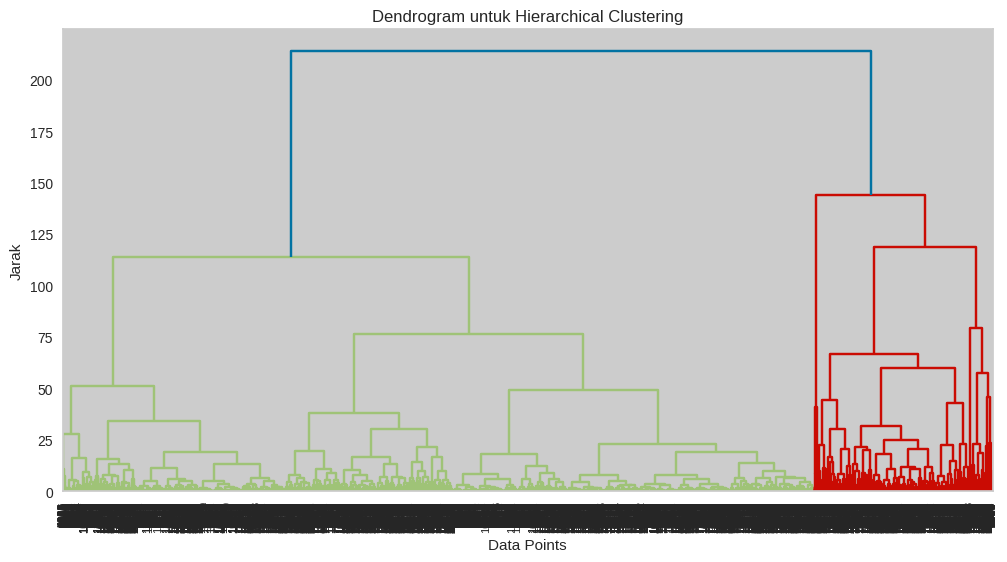

In [ ]:
plt.figure(figsize=(12, 6))
linkage_matrix = linkage(df, method='ward')
dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Dendrogram untuk Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Jarak")
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 3
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')


In [ ]:
sil_score = silhouette_score(df, clusters)
print(f"Silhouette Score: {sil_score:.4f}")


Silhouette Score: 0.5079


In [ ]:
kmedoids = KMedoids(n_clusters=4, random_state=42, metric='euclidean')
kmedoids.fit(df)

KMedoids(n_clusters=4, random_state=42)

In [ ]:
sil_score = silhouette_score(df, clusters)
print(f"Silhouette Score: {sil_score:.4f}")


Silhouette Score: 0.5079
